In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '000_cloth_set_30.jpeg',
 'arc-de-triomphe.jpg',
 'baobab.jpg',
 'bipin.jpg',
 'cardumen.jpg',
 'city.png',
 'delfines.jpg',
 'Frutas-bajas-calorias.jpg',
 'fuji.jpg',
 'group1.jpg',
 'haarcascade_frontalface_default.xml',
 'image-segmentation-vs-instance-segmentation.jpg',
 'kilimanjaro_jirafa.jpg',
 'Lab_1_2_CV.ipynb',
 'nemo.jpg',
 'new-york-city.jpg',
 'nz_mountain.jpeg',
 'Rio_Janeiro_Galeao_Airport.jpg',
 'vancouver.jpg']

In [ ]:
# MatheMatica

https://nicoguaro.github.io/posts/wolfram_jupyter/

https://community.wolfram.com/groups/-/m/t/1884517

In [ ]:
# Adapted from https://www.codespeedy.com/detect-number-of-faces-from-an-image-in-python-using-opencv/
facedetector=cv2.CascadeClassifier(path+'/haarcascade_frontalface_default.xml')

number of faces: 1


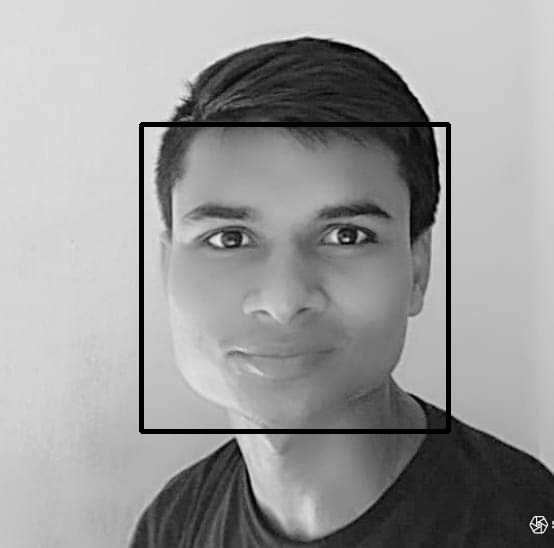

In [ ]:
my=cv2.imread(path+"/bipin.jpg")
my = cv2.cvtColor(my, cv2.COLOR_BGR2GRAY)
cv2.waitKey(0) # To get the image in grayscale, here we are using the zero(0).

face=facedetector.detectMultiScale(my,1.1,5)
print('number of faces: '+str(len(face)))
for x,y,z,h in face:
    cv2.rectangle(my,(x,y),(x+z,y+h),(0,0,225),3)
cv2_imshow(my) 

number of faces: 4


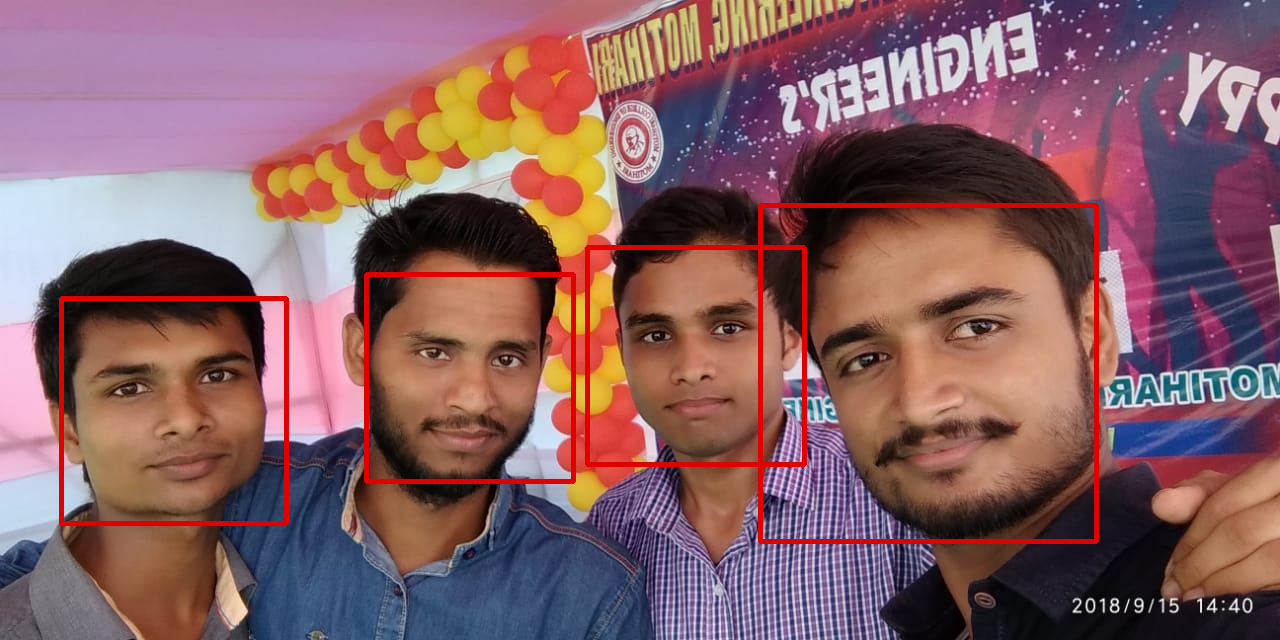

In [ ]:
grupo=cv2.imread(path+"/group1.jpg")
face=facedetector.detectMultiScale(grupo,1.1,5)
print('number of faces: '+str(len(face)))
for x,y,z,h in face:
    cv2.rectangle(grupo,(x,y),(x+z,y+h),(0,0,225),3)
cv2_imshow(grupo)

In [ ]:
face

array([[587, 247, 217, 217],
       [760, 205, 336, 336],
       [366, 274, 207, 207],
       [ 61, 298, 225, 225]], dtype=int32)

Al cargar el dataset, la función retorna cuatro arreglos en `NumPy`:

* Los arreglos `train_images` y `train_labels` son los datos del *training set* que se usan para aprender el modelo.
* Los arreglos `test_images` y `test_labels` son los datos del *test set* que se usan para probar el modelo.

Las imágenes se cargan como arreglos `NumPy` de 28x28, con valores de pixel que varian de 0 a 255 (imagen en escala de grises). Los arreglos *labels* son arreglos de enteros, que van del 0 al 9, con tantas filas como imágenes hay para entrenamiento y para testeo, respectivamente. Estos corresponden a la *clase* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

## Pre-procesar el dataset

El set de datos debe ser pre-procesado antes de entrenar la red. Al visualizar la primera imagen en el set de entrenamiento, encontramos que los valores de los pixeles están entre 0 y 255:

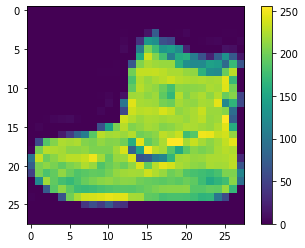

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

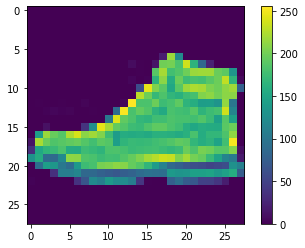

In [ ]:
plt.figure()
plt.imshow(train_images[89])
plt.colorbar()
plt.grid(False)
plt.show()

Antes de entrenar la red neuronal debemos escalar estos valores en un rango de 0 a 1. Para hacero, dividimos los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos está en el formato adecuado y que están listos para entrenar la red, veamos las primeras 25 imágenes de el *training set* junto al nombre de clase debajo de cada imagen.

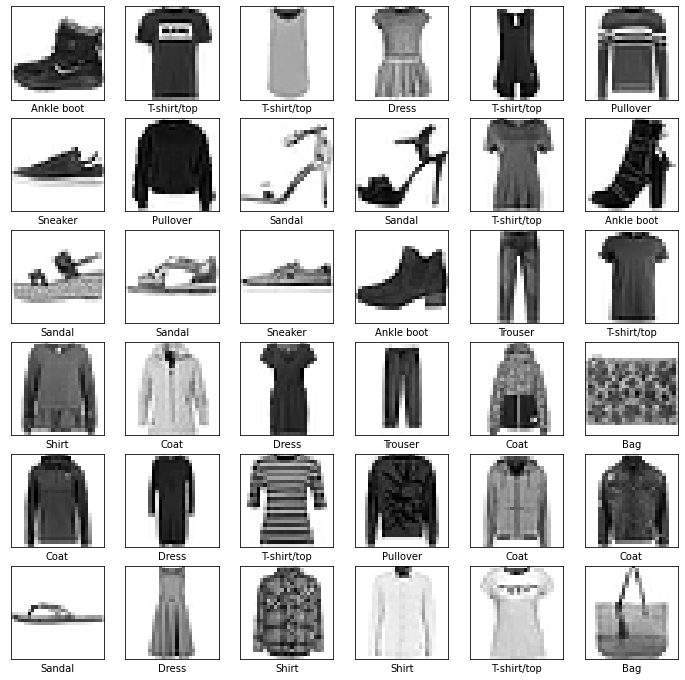

In [ ]:
lado_recuadro=6
plt.figure(figsize = (2*lado_recuadro, 2*lado_recuadro))
for i in range(lado_recuadro*lado_recuadro):
    plt.subplot(lado_recuadro, lado_recuadro, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Por último vamos crear una función que nos permita graficar la probabilidad de clase de cada una de las imagenes del dataset de pruebas.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Tomemos como ejemplos la primer imagen del conjunto de testeo (`i=0`) y la décimotercera (`i=12`). Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje para la etiqueta predicha.

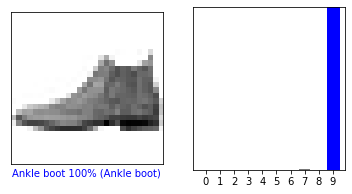

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

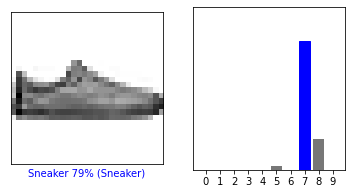

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora vamos a graficar multiples imágenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

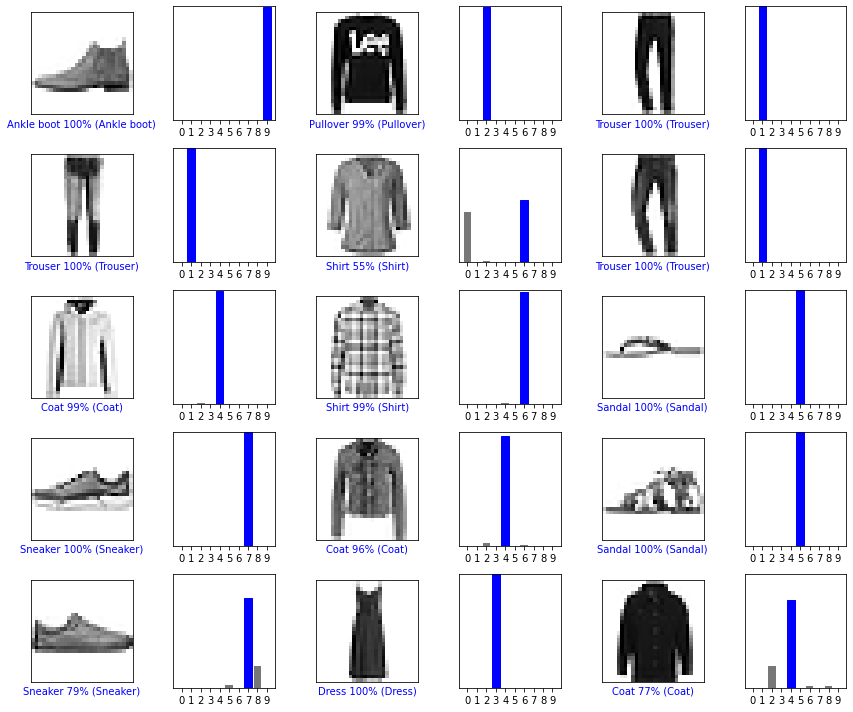

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una predicción sobre una única imagen.

Los modelos de `tf.keras` se optimizan para hacer predicciones en un lote de ejemplos a la vez. En consecuencia, a pesar de que está utilizando una sola imagen, es necesario añadirla a una lista de la cual es el único miembro:

In [ ]:
j=1
img = (np.expand_dims(test_images[j],0))
print(img.shape)

(1, 28, 28)


Ahora se puede predecir la etiqueta correcta para esta única imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1840014e-04 1.4945213e-10 9.9151552e-01 6.8878085e-09 7.2822655e-03
  2.1129390e-13 9.8343776e-04 3.0631051e-13 3.1483631e-07 3.0603767e-10]]


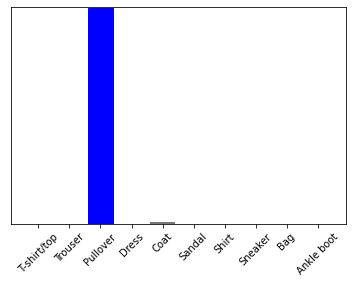

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del lote de imágenes. Por lo tanto, para tomar la prediccion de la única imagen dentro del lote hacemos:

In [ ]:
pred_label_single = np.argmax(predictions_single[0])
print(pred_label_single, " [", class_names[pred_label_single], "]", sep="")

2 [Pullover]


Y el modelo predice la etiqueta 2 (pullover).

---

# Trabajo Práctico 1 (primera parte)

Eduardo Barseghian, DNI 34990771, eduardo.barseghian@mi.unc.edu.ar
---

In [2]:
# Librerias de ayuda
try:
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow  # #cv2.imshow("bipin",my) cv2.imshow() is disabled in Colab
import numpy as np
import skimage.measure
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

# FASHION MNIST DATASET

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


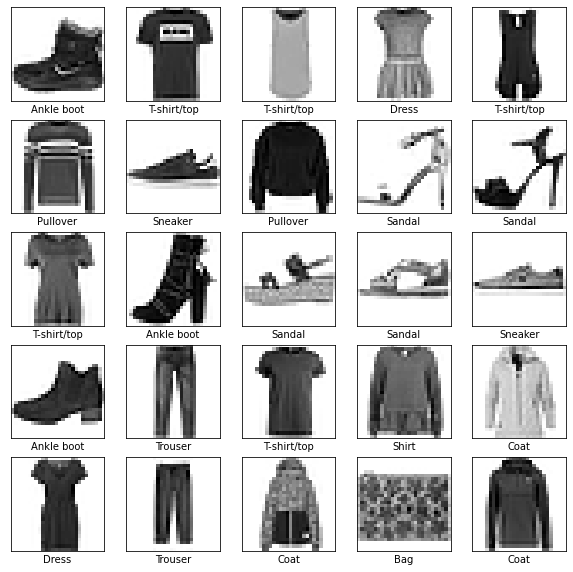

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **EJERCICIO 1.1**: predecir nuevas imágenes de moda con el modelo previamente entrenado

1. **Crear un nuevo dataset** propio con **30 imágenes** en total (3 imágenes de cada categoría). Estás imágenes no deben ser tomadas del dataset original (Fashion MNIST). Pueden capturar sus propias imágenes o buscarlas en la web. **Como sea, recuerden que deben preprocesar las imágenes para que tengan exactamente el mismo formato de entrada que requiere la red.**

1. **Mostrar todas las imágenes del conjunto de testeo** creado por ustedes para que se pueda inspeccionar rápidamente su contenido.

1. Tomando la ANN previamente entrenada, **predecir las etiquetas** de cada imagen del dataset y reportar los resultados de **accuracy** (y **opcionalmente** cualquier otra métrica que le resulte adecuada, como ser **precisión** y **recall**)


In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/diplo_grafos/vision_computadora'

import sys
sys.path.insert(0,path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


![](https://drive.google.com/file/d/1DnBGiLhN9P8RW4V3RgWTxil0TUMemHWZ/view?usp=sharing)

In [9]:
from skimage import io

image = io.imread(url)
cv2_imshow(image) 

ValueError: ignored

In [8]:
req = urllib.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

cv2.imshow('lalala', img)
if cv2.waitKey() & 0xff == 27: quit()

AttributeError: ignored

In [7]:
url = "https://drive.google.com/file/d/1DnBGiLhN9P8RW4V3RgWTxil0TUMemHWZ/view?usp=sharing"

In [5]:
# EJERCICIO 1.1
# Dataset extraído en su mayoría de https://medium.com/data-science-insider/clothing-dataset-5b72cd7c3f1f
# Se hizo una selección, y se agregaron algunos calzados con la orientación deseada.
# Había problemas para leer desde Medium, se descargó la imagen.
# clothes_set_30=cv2.imread(path+'/000_cloth_set_30.jpeg')
clothes_set_30=cv2.imread("https://drive.google.com/file/d/1DnBGiLhN9P8RW4V3RgWTxil0TUMemHWZ/view?usp=sharing")
cv2_imshow(clothes_set_30) 
#cv2.waitKey(0) # To get the image in grayscale, here we are using the zero(0).

AttributeError: ignored

Recordamos las labels <table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
# Etiquetamos
labels_30=np.array([7, 3, 5, 1, 7, 1, 7, 2, 0, 0, 8, 2, 7, 1, 9, 6, 0, 4, 1, 5, 1, 0, 0, 4, 6, 1, 2, 2, 6, 4])

In [ ]:
clothes_set_30.shape

(304, 366, 3)

La imagen es a color. Hay 30 prendas, cada una de ellas en un cuadradito de 60x60 pixeles. Nos sobran pixeles a la derecha y abajo (por eso el shape no es exactamente 300x360). Queremos transformar cada prenda a 28x28 pixeles, y luego promediamos cada 2x2 los pixeles.

(280, 336)


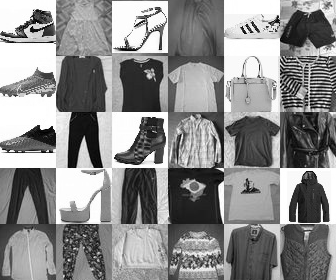

In [ ]:
# Pasamos a blanco y negro
clothes_set_30 = cv2.cvtColor(clothes_set_30, cv2.COLOR_BGR2GRAY)

# A cada recuadrito de 60x60 lo transformaremos en 56x56 recortando bordes
side_len_pixels= 60
grosor_recorte = 2

# La cantidad de filas/columnas de la "matriz de prendas" serán guardadas como variables que dependen del tamaño de los recuadritos
clothes_per_column = int(clothes_set_30.shape[0]/side_len_pixels)
clothes_per_row = int(clothes_set_30.shape[1]/side_len_pixels)

congruencias_malas = list(range(grosor_recorte)) + list(range(side_len_pixels-grosor_recorte, side_len_pixels)) # [0,1,58,59]

# Recortamos "filas borde"
filas_reducidas = [i for i in range(side_len_pixels*clothes_per_column) if i%side_len_pixels not in congruencias_malas]
clothes_set_30 = clothes_set_30[filas_reducidas]

# Recortamos "columnas borde", aprovechando el operador transpuesta
clothes_set_30= np.transpose(clothes_set_30)
columnas_reducidas = [i for i in range(side_len_pixels*clothes_per_row) if i%side_len_pixels not in congruencias_malas]
clothes_set_30 = clothes_set_30[columnas_reducidas]
clothes_set_30 = np.transpose(clothes_set_30)

print(clothes_set_30.shape)
cv2_imshow(clothes_set_30) 

Como las dimensiones del arreglo total y de cada una de las 30 prendas son pares, podemos aplicar el "promedio" sobre el arreglo total.

(140, 168)


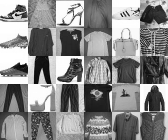

In [ ]:
clothes_set_30 = skimage.measure.block_reduce(clothes_set_30, (2,2), np.mean)
print(clothes_set_30.shape)
cv2_imshow(clothes_set_30) 

In [ ]:
# Queremos que clothes_set sea un arreglo de dimensiones 30x28x28
# Ahora cada prenda es 28x28, ya no 60x60

side_len_pixels= 28
clothes_per_column = int(clothes_set_30.shape[0]/side_len_pixels)
clothes_per_row = int(clothes_set_30.shape[1]/side_len_pixels)

filas_prendas = []
prendas_=[]

for i in range(clothes_per_column):
  bloque_filas = list(range(i*side_len_pixels , (1+i)*side_len_pixels))
  filas_prendas.append(clothes_set_30[bloque_filas])
  x = np.transpose(filas_prendas[i])
  for j in range(clothes_per_row):
    bloque_columnas = list(range(j*side_len_pixels , (1+j)*side_len_pixels))
    prenda = np.transpose(x[bloque_columnas])
    prendas_.append(prenda)

clothes_deck =  np.array(prendas_)

In [ ]:
cv2_imshow(clothes_deck[24]) 

In [ ]:
clothes_deck.shape

(30, 28, 28)

In [ ]:
np.min(clothes_deck), np.max(clothes_deck)

(4.0, 255.0)

In [ ]:
# Normalizamos
clothes_deck = clothes_deck / 255.0

In [ ]:
# Corremos el modelo ANN dado

model_ann = keras.Sequential([layers.Flatten(input_shape=(28, 28)),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(10, activation='softmax')
                         ])
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_ann = model_ann.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss_ann, test_acc_ann = model_ann.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4999 - accuracy: 0.8245 - val_loss: 0.4241 - val_accuracy: 0.8466
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8655 - val_loss: 0.4039 - val_accuracy: 0.8574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8779 - val_loss: 0.3643 - val_accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3108 - accuracy: 0.8856 - val_loss: 0.3647 - val_accuracy: 0.8695
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8927 - val_loss: 0.3511 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8968 - val_loss: 0.3318 - val_accuracy: 0.8850
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9019 - val_loss: 0.3545 - val_accuracy:

Resulta que la *accuracy* sobre el set de datos de pruebas es un poco menor que la *accuracy* sobre el set de entrenamiento, leve *overfitting*.

In [ ]:
# Evaluamos sobre las prendas recolectadas
test_loss_30, test_acc_30 = model_ann.evaluate(clothes_deck,  labels_30, verbose=2)

1/1 - 0s - loss: 27.7514 - accuracy: 0.0333 - 116ms/epoch - 116ms/step


Dio horrible, una Accuracy de 0.033 quiere decir que acertó la predicción de solamente 1 de las 30 prendas.

In [ ]:
predictions_30 = model_ann.predict(clothes_deck)

for nro_prenda in range(30):
  pred_label = np.argmax(predictions_30[nro_prenda])
  print(pred_label, class_names[pred_label], labels_30[nro_prenda], (" "+class_names[labels_30[nro_prenda]]).zfill(9), pred_label==labels_30[nro_prenda], sep="\t")

8	Bag	7	0 Sneaker	False
8	Bag	3	000 Dress	False
8	Bag	5	00 Sandal	False
8	Bag	1	0 Trouser	False
8	Bag	7	0 Sneaker	False
8	Bag	1	0 Trouser	False
8	Bag	7	0 Sneaker	False
8	Bag	2	 Pullover	False
8	Bag	0	 T-shirt/top	False
8	Bag	0	 T-shirt/top	False
8	Bag	8	00000 Bag	True
8	Bag	2	 Pullover	False
8	Bag	7	0 Sneaker	False
8	Bag	1	0 Trouser	False
8	Bag	9	 Ankle boot	False
8	Bag	6	000 Shirt	False
8	Bag	0	 T-shirt/top	False
8	Bag	4	0000 Coat	False
8	Bag	1	0 Trouser	False
8	Bag	5	00 Sandal	False
8	Bag	1	0 Trouser	False
8	Bag	0	 T-shirt/top	False
8	Bag	0	 T-shirt/top	False
8	Bag	4	0000 Coat	False
8	Bag	6	000 Shirt	False
8	Bag	1	0 Trouser	False
8	Bag	2	 Pullover	False
8	Bag	2	 Pullover	False
8	Bag	6	000 Shirt	False
8	Bag	4	0000 Coat	False


El modelo ANN predijo como bag a todas las imágenes, el único acierto fue la única bag.

### LAB 2 : entrenar la CNN de CIFAR10 para el Fashion MNIST data set.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D 

In [ ]:
(cifar10_train, _), _ = keras.datasets.cifar10.load_data()

cifar10_train.shape, train_images.shape

((50000, 32, 32, 3), (60000, 28, 28))

Los datasets de CIFAR tienen 4 dimensiones, donde la última(==3) corresponde a los 3 colores de RGB. El modelo tiene input_shape=(32, 32, 3).
Para correrlo con FashionMNIST basta agregarle una cuarta dimensión(==1) a los conjuntos de train y test; y poner input_shape=(28, 28, 1)

In [ ]:
train_images, test_images = train_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)

In [ ]:
# REPLICAMOS EL MODELO de la NOTEBOOK 2, adaptando el input_shape a FashionMNIST. 

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # 1st convolution layer: 32 filters of 3x3, ReLU activation function
model_cnn.add(layers.MaxPooling2D((2, 2)))                                            # 1st max pooling layer: 2x2

model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_cnn.add(layers.Flatten())                                      
model_cnn.add(layers.Dense(64, activation='relu'))                   
model_cnn.add(layers.Dense(len(class_names), activation='softmax'))                   # Output layer

model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 576)             

In [ ]:
# Compilar y entrenar el modelo CNN

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_cnn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4942 - accuracy: 0.8201 - val_loss: 0.3781 - val_accuracy: 0.8586
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3221 - accuracy: 0.8829 - val_loss: 0.3136 - val_accuracy: 0.8846
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2759 - accuracy: 0.8999 - val_loss: 0.2922 - val_accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2436 - accuracy: 0.9103 - val_loss: 0.2805 - val_accuracy: 0.8979
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2189 - accuracy: 0.9194 - val_loss: 0.2722 - val_accuracy: 0.9020
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1985 - accuracy: 0.9259 - val_loss: 0.2655 - val_accuracy: 0.9090
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1816 - accuracy: 0.9323 - val_loss: 0.2592 -

# Evaluación de modelos 

## CNN

In [ ]:
test_loss_cnn, test_acc_cnn

(0.3424736261367798, 0.8895000219345093)

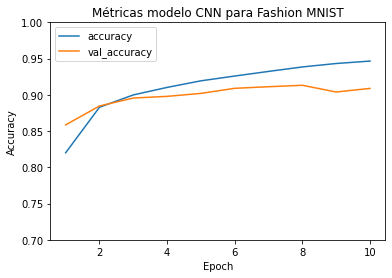

In [ ]:
sns.lineplot(x=range(1,11), y=history.history['accuracy'], label='accuracy', ci=None)#, ax=ax)
sns.lineplot(x=range(1,11), y=history.history['val_accuracy'], label='val_accuracy', ci=None)#, ax=ax)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.title("Métricas modelo CNN para Fashion MNIST")
plt.show()

## ANN

In [ ]:
test_loss_ann, test_acc_ann

(0.3428020179271698, 0.8831999897956848)

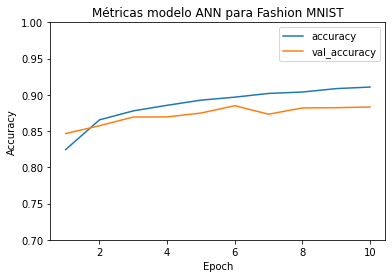

In [ ]:
sns.lineplot(x=range(1,11), y=history_ann.history['accuracy'], label='accuracy', ci=None)#, ax=ax)
sns.lineplot(x=range(1,11), y=history_ann.history['val_accuracy'], label='val_accuracy', ci=None)#, ax=ax)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.title("Métricas modelo ANN para Fashion MNIST")
plt.show()

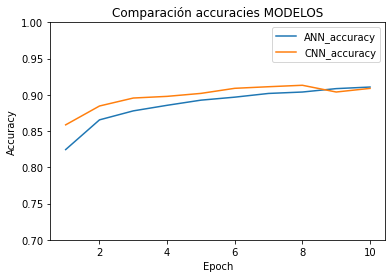

In [ ]:
sns.lineplot(x=range(1,11), y=history_ann.history['accuracy'], label='ANN_accuracy', ci=None)#, ax=ax)
sns.lineplot(x=range(1,11), y=history.history['val_accuracy'], label='CNN_accuracy', ci=None)#, ax=ax)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.title("Comparación accuracies MODELOS")
plt.show()

Para estos dos modelos de 10 epochs, el CNN convergió más rapidamente, y pese a que se emparejaron, siguió teniendo una accuracy levemente superior de 0.8895 versus 0.883 del ANN

Ambos modelos presentan un leve sobreajuste, dado que las accuracies son mayores a las respectivas test-accuracies.

## **EJERCICIO 4.1**

1. **Elejir el modelo de detección**. Indague en la web sobre los algoritmos del estado de arte para detección de objetos.
 - ¿Encontrás alguno de estos algoritmos en la lista de modelos disponible en TF Hub? Reportá al menos 3.
 - Seleccioná uno de los tres modelos justificando por que se eligió.
 - Volvé a ejecutar el tutorial para ese modelo


- https://machinelearningmastery.com/object-recognition-with-deep-learning/
- https://en.wikipedia.org/wiki/Object_detection
- https://www.tensorflow.org/hub/tutorials/tf2_object_detection?hl=en
- https://www.tensorflow.org/lite/models/object_detection/overview?hl=en

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub
import keras

tf.get_logger().setLevel('ERROR')

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  image = None
  if(path.startswith('http')):
    response = urlopen(path)
    image_data = response.read()
    image_data = BytesIO(image_data)
    image = Image.open(image_data)
  else:
    image_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(image_data))

  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (1, im_height, im_width, 3)).astype(np.uint8)


ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512' : 'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640' : 'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768' : 'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896' : 'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024' : 'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280' : 'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536' : 'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640' : 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333' : 'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1',
}

IMAGES_FOR_TEST = {
  'Beach' : 'models/research/object_detection/test_images/image2.jpg',
  'Dogs' : 'models/research/object_detection/test_images/image1.jpg',
  # By Heiko Gorski, Source: https://commons.wikimedia.org/wiki/File:Naxos_Taverna.jpg
  'Naxos Taverna' : 'https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_Coleoptera_of_the_British_islands_(Plate_125)_(8592917784).jpg
  'Beatles' : 'https://upload.wikimedia.org/wikipedia/commons/1/1b/The_Coleoptera_of_the_British_islands_%28Plate_125%29_%288592917784%29.jpg',
  # By Américo Toledano, Source: https://commons.wikimedia.org/wiki/File:Biblioteca_Maim%C3%B3nides,_Campus_Universitario_de_Rabanales_007.jpg
  'Phones' : 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg/1024px-Biblioteca_Maim%C3%B3nides%2C_Campus_Universitario_de_Rabanales_007.jpg',
  # Source: https://commons.wikimedia.org/wiki/File:The_smaller_British_birds_(8053836633).jpg
  'Birds' : 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg',
}

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10), (5, 6), (5, 11), (6, 12), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)]

https://viso.ai/deep-learning/object-detection/

Person Detection is a variant of object detection, in images or video frames. Detecting people in video streams is an important task in modern video surveillance systems.Most modern person detector techniques are trained on frontal and asymmetric views.



## YOLOv3 - 2018 https://viso.ai/deep-learning/yolov3-overview/ (February 2021)
It is a dep CNN that that identifies specific objects in real-time; in videos, live feeds, or images.The original YOLO is from 2016. YOLOs are implemented using Keras or OpenCV.

YOLO is named “you only look once” because its prediction uses 1×1 convolutions; the size of the prediction map is exactly the size of the feature map before it. It is much faster than other networks, while maintaining accuracy.

It allows the model to look at the whole image at test time, so its predictions are informed by the global context in the image. YOLO and other CNNs “score” regions based on their similarities to predefined classes.

In a live feed of traffic, YOLO works with predefined classes of vehicles.

YOLOv3 first separates an image into a grid. Each grid cell predicts some number of boundary boxes around objects that score highly with the aforementioned predefined classes. Each boundary box has a respective confidence score of how accurate it assumes that prediction should be and detects only one object per bounding box. The boundary boxes are generated by clustering the dimensions of the ground truth boxes from the original dataset to find the most common shapes and sizes. YOLO is trained to do classification and bounding box regression at once. YOLOv3 uses Darknet-53 as backbone. 

Other algorithms that can carry out the same goal are R-CNN (Region-based CNNs - 2015), Fast R-CNN (R-CNN improvement - 2017), and Mask R-CNN.

## Specificity of Classes
The new YOLOv3 uses independent logistic classifiers and binary cross-entropy loss for the class predictions during training. These edits make it possible to use complex datasets such as Microsoft’s Open Images Dataset (OID) for training. OID contains dozens of overlapping labels, such as “man” and “person” for images in the dataset.

YOLO v3 uses a multilabel approach which allows classes to be more specific and be multiple for individual bounding boxes. YOLOv2 used a softmax, which makes it so that each bounding box can only belong to one class. 

## Disadvantages of YOLOv3 vs. Other Algorithms
Trade-off between speed and accuracy when compared to RetinaNet since RetinaNet training time is greater than YOLOv3. However, the accuracy of detecting objects with YOLOv3 can be made equal to the accuracy when using RetinaNet by having a larger dataset, making it an ideal option for models that can be trained with large datasets. An example of this would be traffic detection.





 




https://viso.ai/deep-learning/mask-r-cnn/

https://viso.ai/deep-learning/object-detection/

https://github.com/Garima13a/YOLO-Object-Detection

https://www.coral.ai/models/object-detection/

https://blog.roboflow.com/object-detection/

https://paperswithcode.com/method/scanssd

## https://viso.ai/deep-learning/mask-r-cnn/

In [ ]:
https://drive.google.com/file/d/1XzarGxkfcRJdp-kpV2UJLzIj4LLzZdbo/view?usp=sharing